In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 2 Cleaning

In [3]:
data2.shape

(114000, 21)

In [4]:
data2.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
#number of unique genres
len(set(data2["track_genre"]))

114

## Maybe we can drop this 1 row with the nan values?

In [6]:
#all the rows that are null
data2[data2['artists'].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


## Label encoding variables in data 2

In [7]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


                  popularity  duration_ms  danceability    energy       key  \
popularity          1.000000    -0.007101      0.035448  0.001056 -0.003853   
duration_ms        -0.007101     1.000000     -0.073426  0.058523  0.008114   
danceability        0.035448    -0.073426      1.000000  0.134325  0.036469   
energy              0.001056     0.058523      0.134325  1.000000  0.048006   
key                -0.003853     0.008114      0.036469  0.048006  1.000000   
loudness            0.050423    -0.003470      0.259077  0.761690  0.038590   
mode               -0.013931    -0.035556     -0.069219 -0.078362 -0.135916   
speechiness        -0.044927    -0.062600      0.108626  0.142509  0.020418   
acousticness       -0.025472    -0.103788     -0.171533 -0.733906 -0.040937   
instrumentalness   -0.095139     0.124371     -0.185606 -0.181879 -0.006823   
liveness           -0.005387     0.010321     -0.131617  0.184796 -0.001600   
valence            -0.040534    -0.154479      0.477

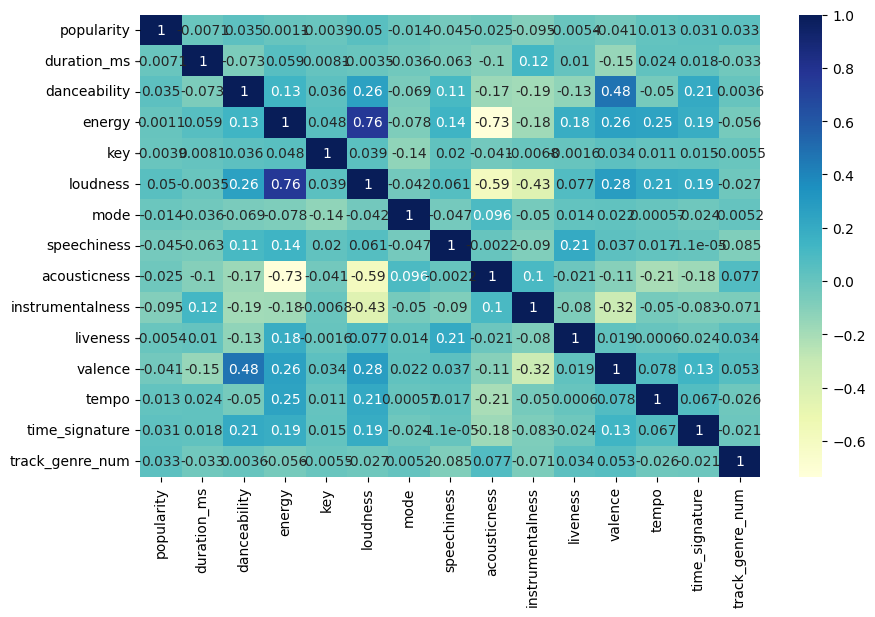

In [8]:
selected_data2 = data2[["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature", "track_genre_num"]]
print(selected_data2.corr()) 
# plotting correlation heatmap 
plt.figure(figsize=(10,6))
data2plot = sns.heatmap(selected_data2.corr(), cmap="YlGnBu", annot=True) 

# displaying heatmap 
plt.show() 

In [14]:
abs(selected_data2.corr()["track_genre_num"]).sort_values()

danceability        0.003569
mode                0.005242
key                 0.005508
time_signature      0.021005
tempo               0.025926
loudness            0.027233
popularity          0.032692
duration_ms         0.032826
liveness            0.033565
valence             0.053307
energy              0.056175
instrumentalness    0.070664
acousticness        0.077217
speechiness         0.085145
track_genre_num     1.000000
Name: track_genre_num, dtype: float64

## Distribution of Features

In [9]:
features = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature", 'track_genre']
len(features)

15

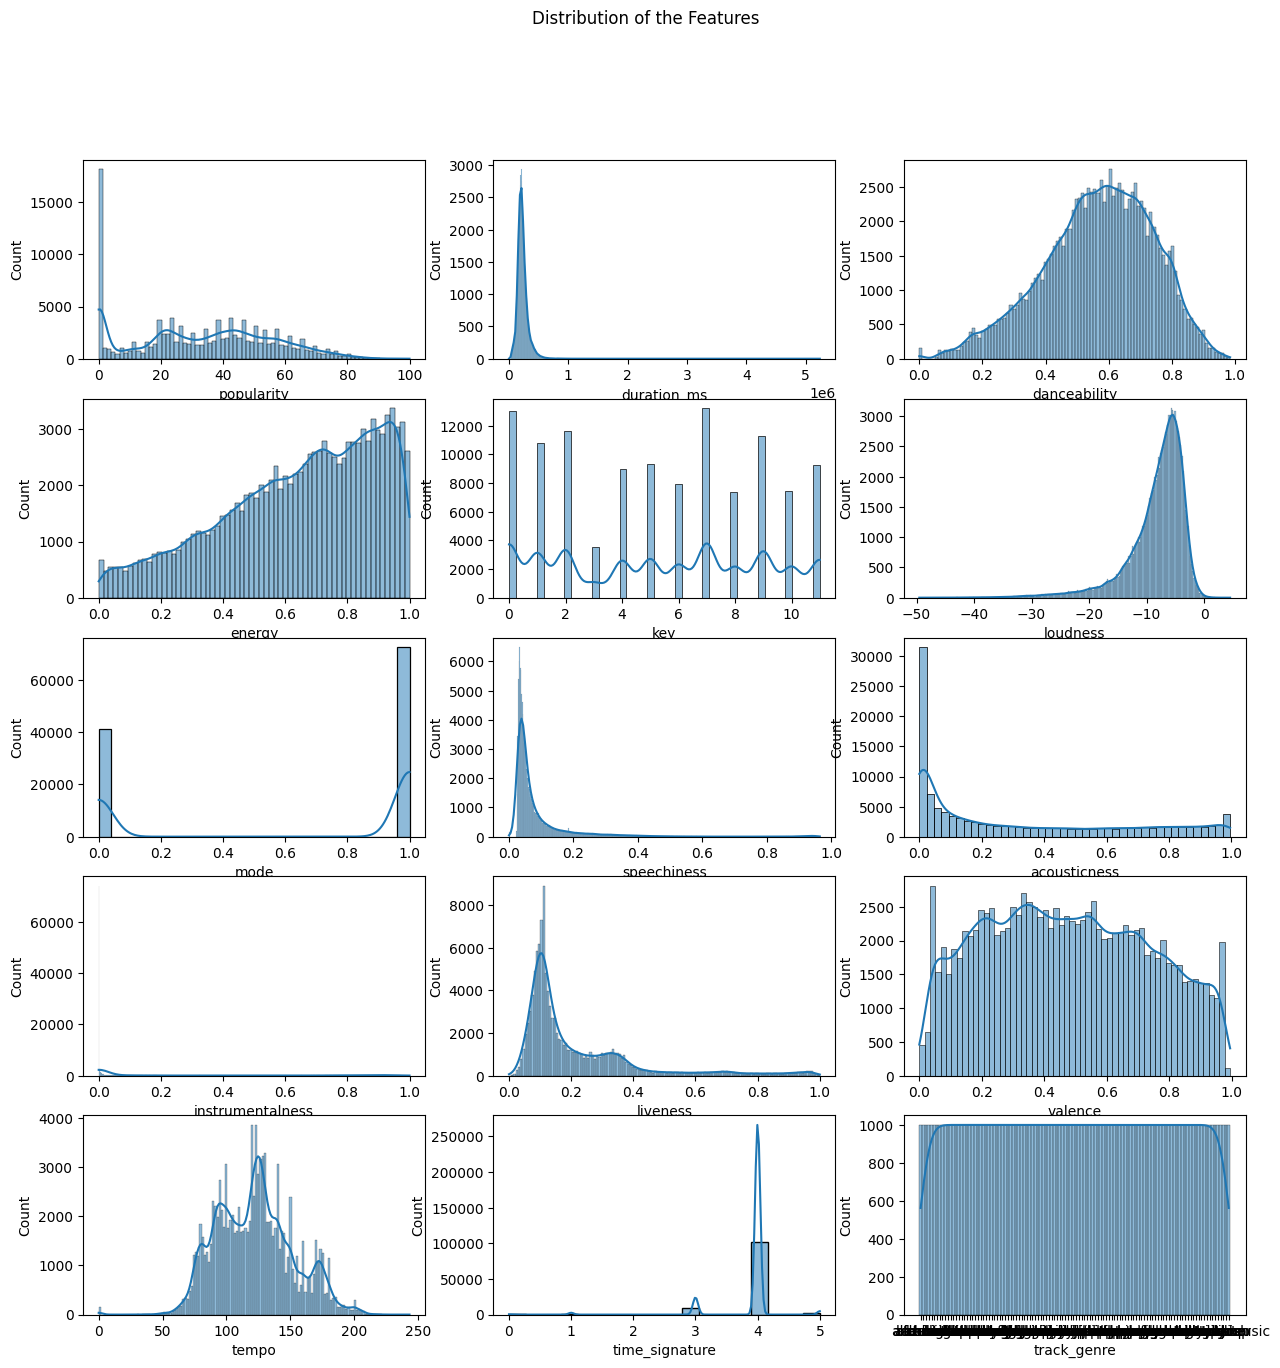

In [10]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('Distribution of the Features')
x = 0
y = 0
for f, ax in zip(features, axs.flat):
    sns.histplot(data2[f], kde = True, ax=ax)
    ax.set_xlabel(f)

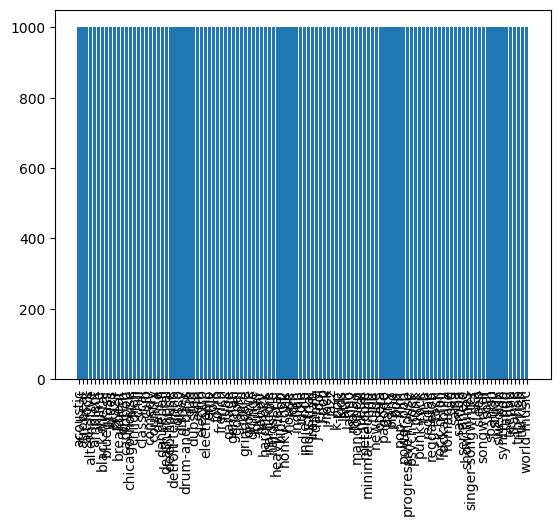

In [11]:
unique_label, counts = np.unique(data2["track_genre"], return_counts=True)
# Create a bar chart
plt.bar(unique_label, counts)

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>